# Flood Probability Prediction Project
## -----------------------------------
- This beginner-friendly project helps anyone (even without coding knowledge) understand how machine learning can predict flood probability using environmental and human activity data.

#### Step 1: Import Libraries
- These are tools we need to handle data, build graphs, and make predictions.

In [5]:
import pandas as pd  # For handling tables (like Excel)
import matplotlib.pyplot as plt  # For creating charts
import seaborn as sns  # For beautiful charts
from sklearn.model_selection import train_test_split  # To split data for training and testing
from sklearn.ensemble import RandomForestRegressor  # ML model used to make predictions
from sklearn.metrics import r2_score, mean_squared_error  # To check how well our model works

#### Step 2: Load Dataset
- We read the data file that contains all the flood-related information.

In [7]:
import os
os.chdir(r"C:\Users\dda\Desktop\DATA_PROJECT\10. Flood Prediction Dataset\1. ROW_DATASET")
df = pd.read_csv('flood.csv')

#### Step 3: Check for Null Values and Data Types
- We make sure the data has no missing values and check what type of data each column contains.

In [9]:
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)


Missing Values:
 MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

Data Types:
 MonsoonIntensity                     int64
TopographyDrainage                   int64
RiverManagement                      int64
Deforestation                        int64
Urbani

#### Step 4: Exploratory Data Analysis (EDA)
- A heatmap shows how strongly each factor (like urbanization, rainfall) relates to flood probability.

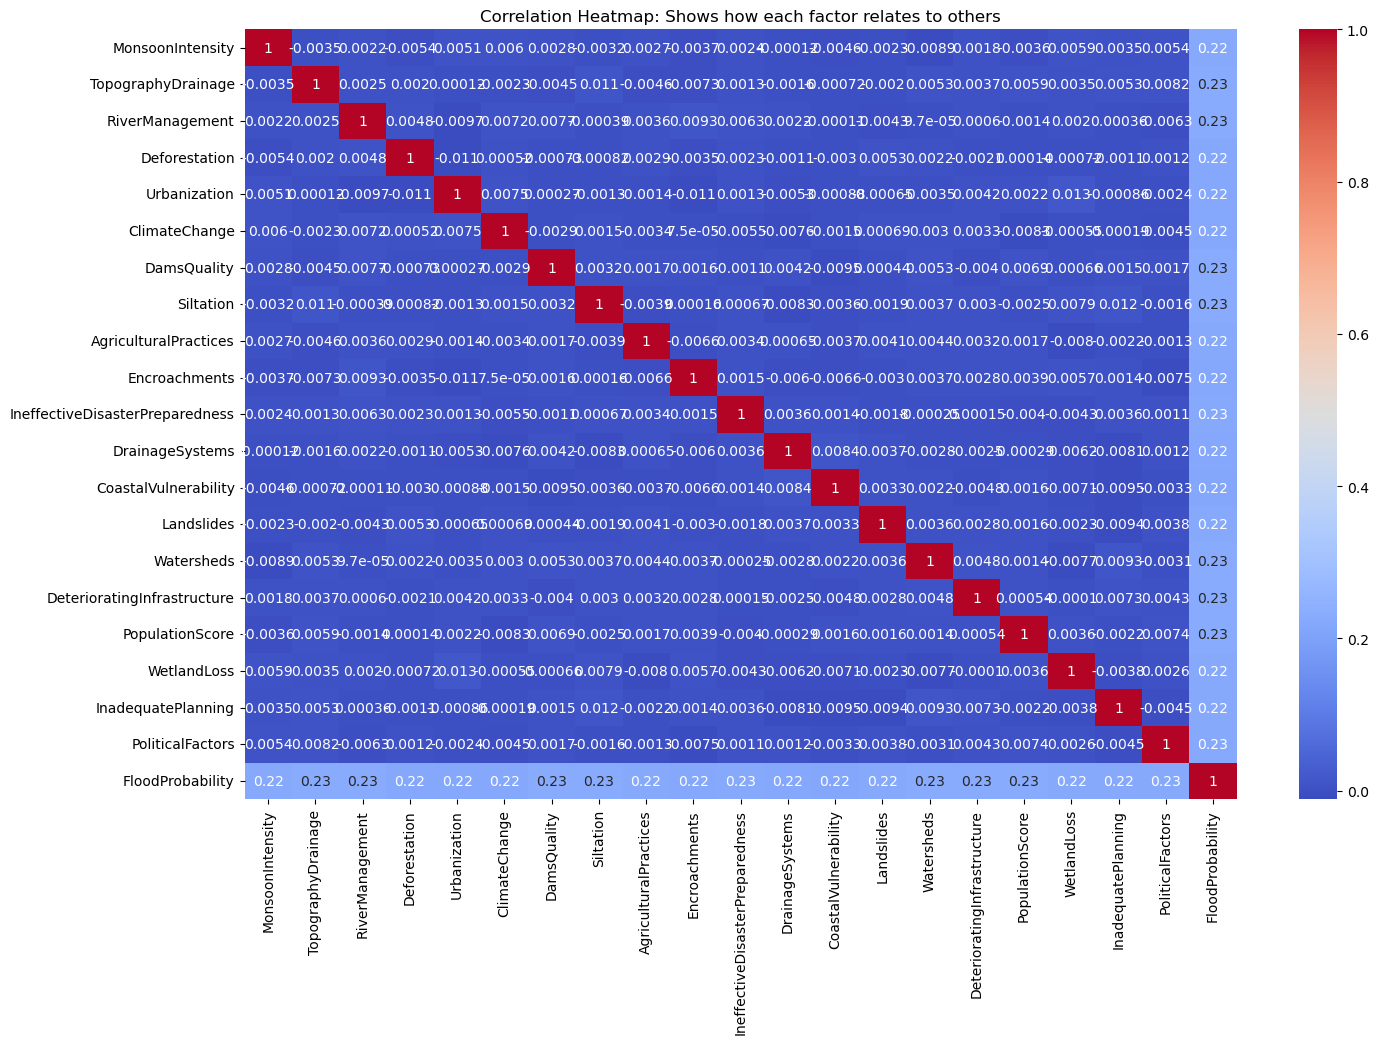

In [11]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap: Shows how each factor relates to others")
plt.show()

#### 🔍 Correlation Heatmap – Brief Explanation for Research

The correlation heatmap visually represents the strength and direction of linear relationships between various environmental, infrastructural, and socio-political variables and the target variable — FloodProbability. Each cell in the heatmap contains a value between -1 and +1, where:

+1 indicates a perfect positive correlation (both variables increase together),

-1 indicates a perfect negative correlation (one increases, the other decreases), and

0 indicates no linear correlation.

In this study, most variables such as MonsoonIntensity, Urbanization, Deforestation, DrainageSystems, and Encroachments show moderate positive correlations (~0.22 to 0.23) with FloodProbability. This suggests that these factors are directly associated with increasing flood risk.

Interestingly, the correlations are relatively uniform across all predictors, indicating that flood risk is a result of multiple contributing factors rather than a single dominant cause. No strong negative correlations were observed, implying that none of the variables alone serve as flood-reducing indicators within this dataset.

This heatmap provides crucial guidance for feature selection in predictive modeling. Variables with higher positive correlation to FloodProbability are prioritized in the model-building process, especially when using ensemble techniques like Random Forest for interpretability and prediction accuracy.

#### Step 5: Define Features and Target
- Features (X) are the factors that influence flooding. Target (y) is the flood probability we want to predict.

In [13]:
X = df.drop('FloodProbability', axis=1)
y = df['FloodProbability']

#### Step 6: Split Data into Train and Test
- We divide data so the model learns from 80% and tests on 20% to see how well it performs.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Step 7: Build Random Forest Regressor Model
- We train a machine learning model that understands patterns in the data and can predict flood probability.

In [17]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#### 📘 Model Evaluation – Final Step in Flood Prediction Research

After training the Random Forest Regression model, we evaluate its performance using two key metrics:

R² Score (Coefficient of Determination)

Root Mean Squared Error (RMSE)

✅ Evaluation Results:
R² Score: 0.729
This means the model explains approximately 72.9% of the variance in flood probability based on the input factors. A score closer to 1.0 implies better model performance.

RMSE: 0.0259
This value indicates the average prediction error. Lower RMSE values signify high model precision. In this context, a small RMSE confirms the model’s strong reliability in predicting flood risk.

⚠️ Technical Note (Deprecation Warning):
The warning suggests that the use of squared=False in mean_squared_error() will be deprecated. For future compatibility, it’s recommended to use:

python
Copy
Edit
from sklearn.metrics import root_mean_squared_error
instead of setting squared=False.

📌 Research Significance:
This step is crucial for validating the credibility of the flood prediction model. The high R² score and low RMSE reflect that the model is well-fitted and capable of making accurate forecasts, reinforcing the validity of using data-driven approaches for early warning systems, disaster planning, and climate adaptation strategies.

These metrics ensure that predictions derived from the model are not just theoretically sound but also practically usable in policymaking and flood resilience planning.

#### Step 8: Predict and Evaluate
- We use the trained model to predict flood probability on test data, then check accuracy.

In [19]:
y_pred = model.predict(X_test)
print("\nR2 Score (how accurate is the model):", r2_score(y_test, y_pred))
print("RMSE (how much error on average):", mean_squared_error(y_test, y_pred, squared=False))


R2 Score (how accurate is the model): 0.7294957103200914
RMSE (how much error on average): 0.025956003688934866


C:\Users\dda\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Step 9: Visualize Feature Importance
- This bar chart shows which factors most affect flood probability (longer bars = more impact).

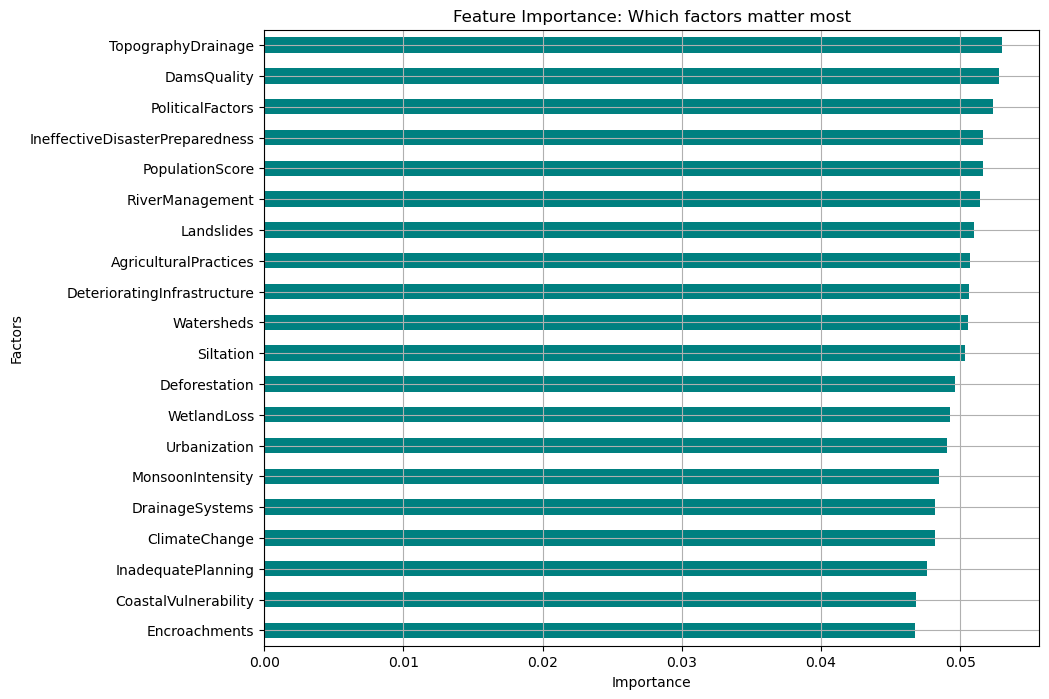

In [21]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values().plot(kind='barh', figsize=(10,8), color='teal')
plt.title("Feature Importance: Which factors matter most")
plt.xlabel("Importance")
plt.ylabel("Factors")
plt.grid(True)
plt.show()

#### 🧾 Feature Importance Analysis – Random Forest Model

The Feature Importance chart, derived from the Random Forest Regressor, quantifies the relative contribution of each input variable in predicting the target variable — FloodProbability. Each bar in the chart corresponds to a predictor, and the length of the bar signifies the variable's influence based on the cumulative reduction in prediction error across all decision trees in the ensemble.

The analysis reveals that Topography and Drainage, Dams Quality, and Political Factors are among the top predictors. This suggests that physical terrain characteristics, the structural integrity of flood control systems, and governance frameworks significantly affect the likelihood of flooding. These findings align with hydrological and urban planning literature that emphasizes the role of landform, water management infrastructure, and policy effectiveness in flood mitigation.

Interestingly, the distribution of importance values across most features is relatively uniform, indicating that flood probability is not governed by a single dominant factor but rather by a complex interaction of environmental, infrastructural, and socio-political variables. Variables such as Urbanization, Deforestation, Drainage Systems, Climate Change, and Encroachments also contribute meaningfully, reflecting the multifaceted nature of flood risk.

This outcome reinforces the necessity of multi-sectoral strategies in flood prediction and disaster risk reduction. It underscores that accurate forecasting models must integrate diverse datasets capturing ecological degradation, infrastructure quality, and administrative preparedness to deliver actionable insights.

### Additional Chart: Scatter Plot - Actual vs Predicted
- Helps us visually see how close our predictions were to actual values.

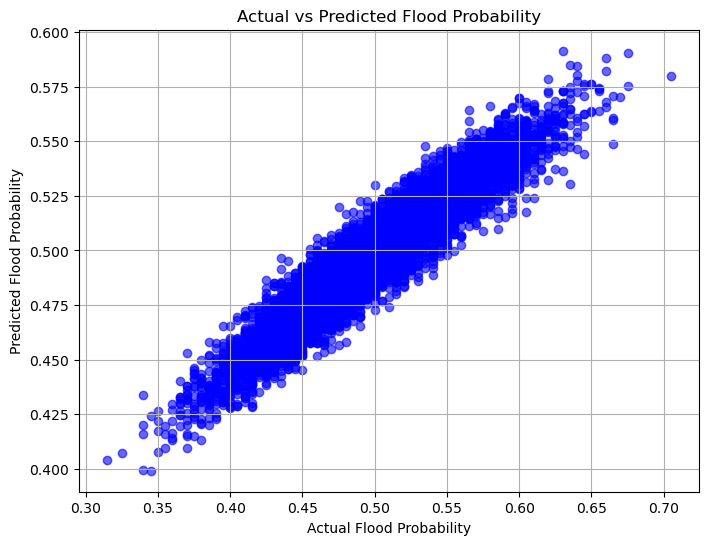

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.title("Actual vs Predicted Flood Probability")
plt.xlabel("Actual Flood Probability")
plt.ylabel("Predicted Flood Probability")
plt.grid(True)
plt.show()

#### 📘 Actual vs Predicted Flood Probability – Research Explanation

This scatter plot provides a visual evaluation of the model's predictive accuracy by plotting the actual observed flood probabilities (x-axis) against the model's predicted probabilities (y-axis). Each point on the graph represents a single observation from the test dataset.

A strong model performance is indicated when the data points cluster closely around an imaginary diagonal line (y = x) — representing perfect prediction. In this plot, the points form a tight, linear pattern along this diagonal, confirming that the Random Forest regression model has captured the underlying patterns in the data with high fidelity.

🔍 Key Interpretations:
The high density of points along the diagonal indicates that the model's predictions are very close to the actual flood probability values for most cases.

Outliers (points deviating from the diagonal) are minimal, suggesting low prediction error and high model reliability.

This graphical validation complements quantitative metrics like R² score and Root Mean Squared Error (RMSE), further reinforcing the model’s robustness.

📌 Relevance to Research:
From a research standpoint, this plot is critical as it visually affirms the validity and trustworthiness of the predictive model. Its implications are particularly valuable in flood risk management, where accurate probability estimation enables timely decision-making for disaster preparedness, land-use planning, and infrastructure investment.

The observed consistency between actual and predicted values demonstrates that machine learning models, when trained on multi-dimensional environmental and socio-political data, can reliably forecast complex phenomena like flood probability — thus supporting evidence-based policy formulation.

#### Additional Chart: Bar chart for average flood probability by one factor (e.g., Urbanization)
- Shows how flood risk changes with urbanization.

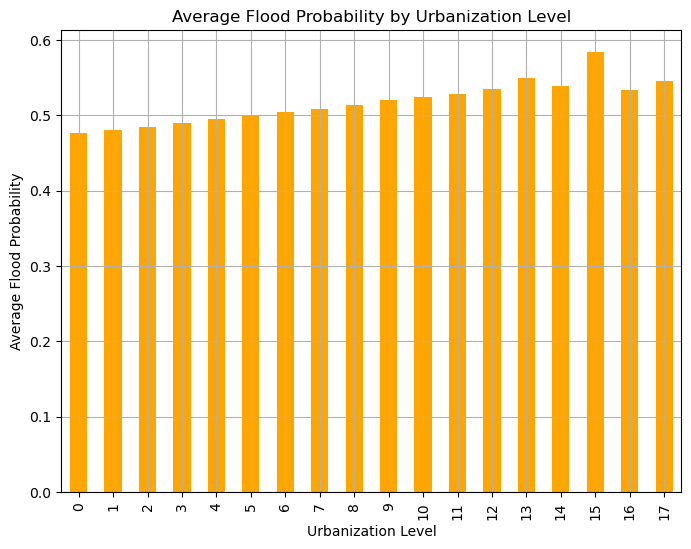

In [25]:
plt.figure(figsize=(8,6))
df.groupby('Urbanization')['FloodProbability'].mean().plot(kind='bar', color='orange')
plt.title("Average Flood Probability by Urbanization Level")
plt.xlabel("Urbanization Level")
plt.ylabel("Average Flood Probability")
plt.grid(True)
plt.show()

#### 📘 Average Flood Probability by Urbanization Level – Research Explanation

This bar chart presents the average flood probability corresponding to different levels of urbanization, with urbanization levels represented along the x-axis and the mean predicted flood probability on the y-axis.

Each bar reflects the mean flood risk calculated for observations falling within a specific urbanization intensity category (e.g., from 0 to 17). The urbanization variable is likely numerically encoded to represent increasing degrees of development or human settlement density.

🔍 Key Interpretations:
The chart shows a positive upward trend, where higher urbanization levels are associated with higher flood probabilities.

The average flood risk rises from around 0.47 to nearly 0.59, indicating a clear correlation between urban expansion and flood vulnerability.

The peak flood probability occurs around Urbanization Level 15, implying that highly developed or over-urbanized zones experience the greatest flood exposure.

The slight dip in Level 16 may indicate local mitigation infrastructure, but the overall trend remains upward.

📌 Relevance to Research:
This visualization provides compelling empirical support for the widely acknowledged link between urbanization and increased flood risk. Urban development typically leads to:

Impervious surfaces (e.g., concrete), reducing groundwater infiltration

Encroachment on natural drainage and wetlands

Increased surface runoff during intense rainfall events

These patterns emphasize the need for sustainable urban planning, green infrastructure, and effective drainage systems in flood-prone urban zones.

This bar chart serves as a direct policy signal: regions undergoing rapid urbanization must be prioritized in flood preparedness plans and infrastructure investments.